# Real Estate Analysis

## Background

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

This is Kaggle's competition: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).

## **Plan**

### 1.1 Understanding the business

- **Objective**: To predict house prices
- **Method**: We will employ 7 distinct machine learning models to determine the most effective approach.

## **Analyze**

### 2.1 Import, Load and Examine

In [79]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.ensemble import GradientBoostingRegressor  # GBM
from sklearn.ensemble import RandomForestRegressor  # Random Forest
from sklearn.tree import DecisionTreeRegressor  # Decision Trees
from sklearn.svm import SVR  # Support Vector Machines (SVM)
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors (KNN)
from xgboost import XGBRegressor  # XGBoost
from lightgbm import LGBMRegressor  # LightGBM

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Evaluate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Data processing
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split

# Ignore warning
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 100)

In [80]:
# Import dataset
# During analysis part, we will use df instead of df_train
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [81]:
df_test = pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2.2 Data Cleaning

#### 2.2.1 Missing Value

In [83]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We have so many missing values - let's handle them column by column.

**Columns have too many missing values**

- Columns `LotFrontage`, `Alley`, `MasVnrType`, `FireplaceQu`, `PoolQC`, `Fence`, and `MiscFeature` have too many values; we drop them and do not use them for analysis. 

**Columns have small parts missing value**

- Columns `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, and `BsmtFinType2` are all categorical data, and we will fill in the value "NA."
- Columns `Electrical` will fill in the value FuseA (Average).
- Columns `GarageType`, `GarageFinish`, `GarageQual`, and `GarageCond` are also all categorical data, and we will fill in the value "NA."
- Columns `GarageYrBlt`, `MasVnrArea` are not categorical data so that we will fill in the median value.

We will do the same thing for both train and test dataset.

> Test dataset: 

The following part is handle missing value for the test dataset only

- Columns `MSZoning` will fill in "RM";
- Columns `Utilities` will fill in "AllPub";
- Columns `Exterior1st`, `Exterior2nd` will fill in "Other";
- Columns `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, and `TotalBsmtSF` will fill in the median value;
- Columns `BsmtFullBath` and `BsmtHalfBath` will fill in the median value;
- Columns `KitchenQual` will fill in "TA";
- Columns `Functional` will fill in "Typ";
- Columns `GarageCars` and `GarageArea` will fill in the median value;
- Columns `SaleType` will fill in "Other";

In [84]:
# Drop the columns has too many missing value(train)
df = df.drop(columns=["LotFrontage", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
# Drop the columns has too many missing value(test)
df_test = df_test.drop(columns=["LotFrontage", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])

# Fill in categorical value
columns_to_fill = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for columns in columns_to_fill:
    df[columns].fillna("NA", inplace=True) # train
    df_test[columns].fillna("NA", inplace=True) # test

df["Electrical"].fillna("FuseA", inplace=True) # train
df_test["Electrical"].fillna("FuseA", inplace=True) # test

# Fill in median value
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True) # train
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True) # train
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].median(), inplace=True) # test
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].median(), inplace=True) # test

# The following code is handle missing value for the test dataset only
df_test["MSZoning"].fillna("RM", inplace=True)
df_test["Utilities"].fillna("AllPub", inplace=True)
df_test["Exterior1st"].fillna("Other", inplace=True)
df_test["Exterior2nd"].fillna("Other", inplace=True)
df_test["KitchenQual"].fillna("TA", inplace=True) 
df_test["Functional"].fillna("Typ", inplace=True)
df_test["SaleType"].fillna("Other", inplace=True)

for column in ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
               "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea"]:
    df_test[column].fillna(df_test[column].median(), inplace=True)

In [85]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [86]:
df_test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

#### 2.2.2 Outliers

There are 80 columns but only 1460 rows of data, and we don't know how data has been collected. So, we don't treat it as an outlier even if we find one.

#### 2.2.3 Duplicates

In [87]:
df.duplicated().sum()

0

### 2.3 Exploratory Data Analysis (EDA)

#### 2.3.1 Sale Price

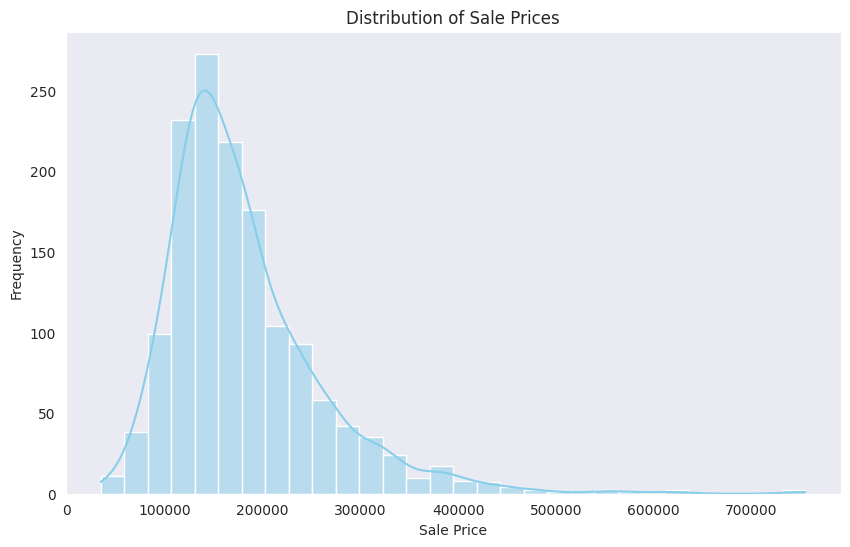

In [88]:
sns.set_style("dark")

# Hist plot
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


#### 2.3.2 Heatmap

Text(0.5, 1.0, 'Variable Correlations')

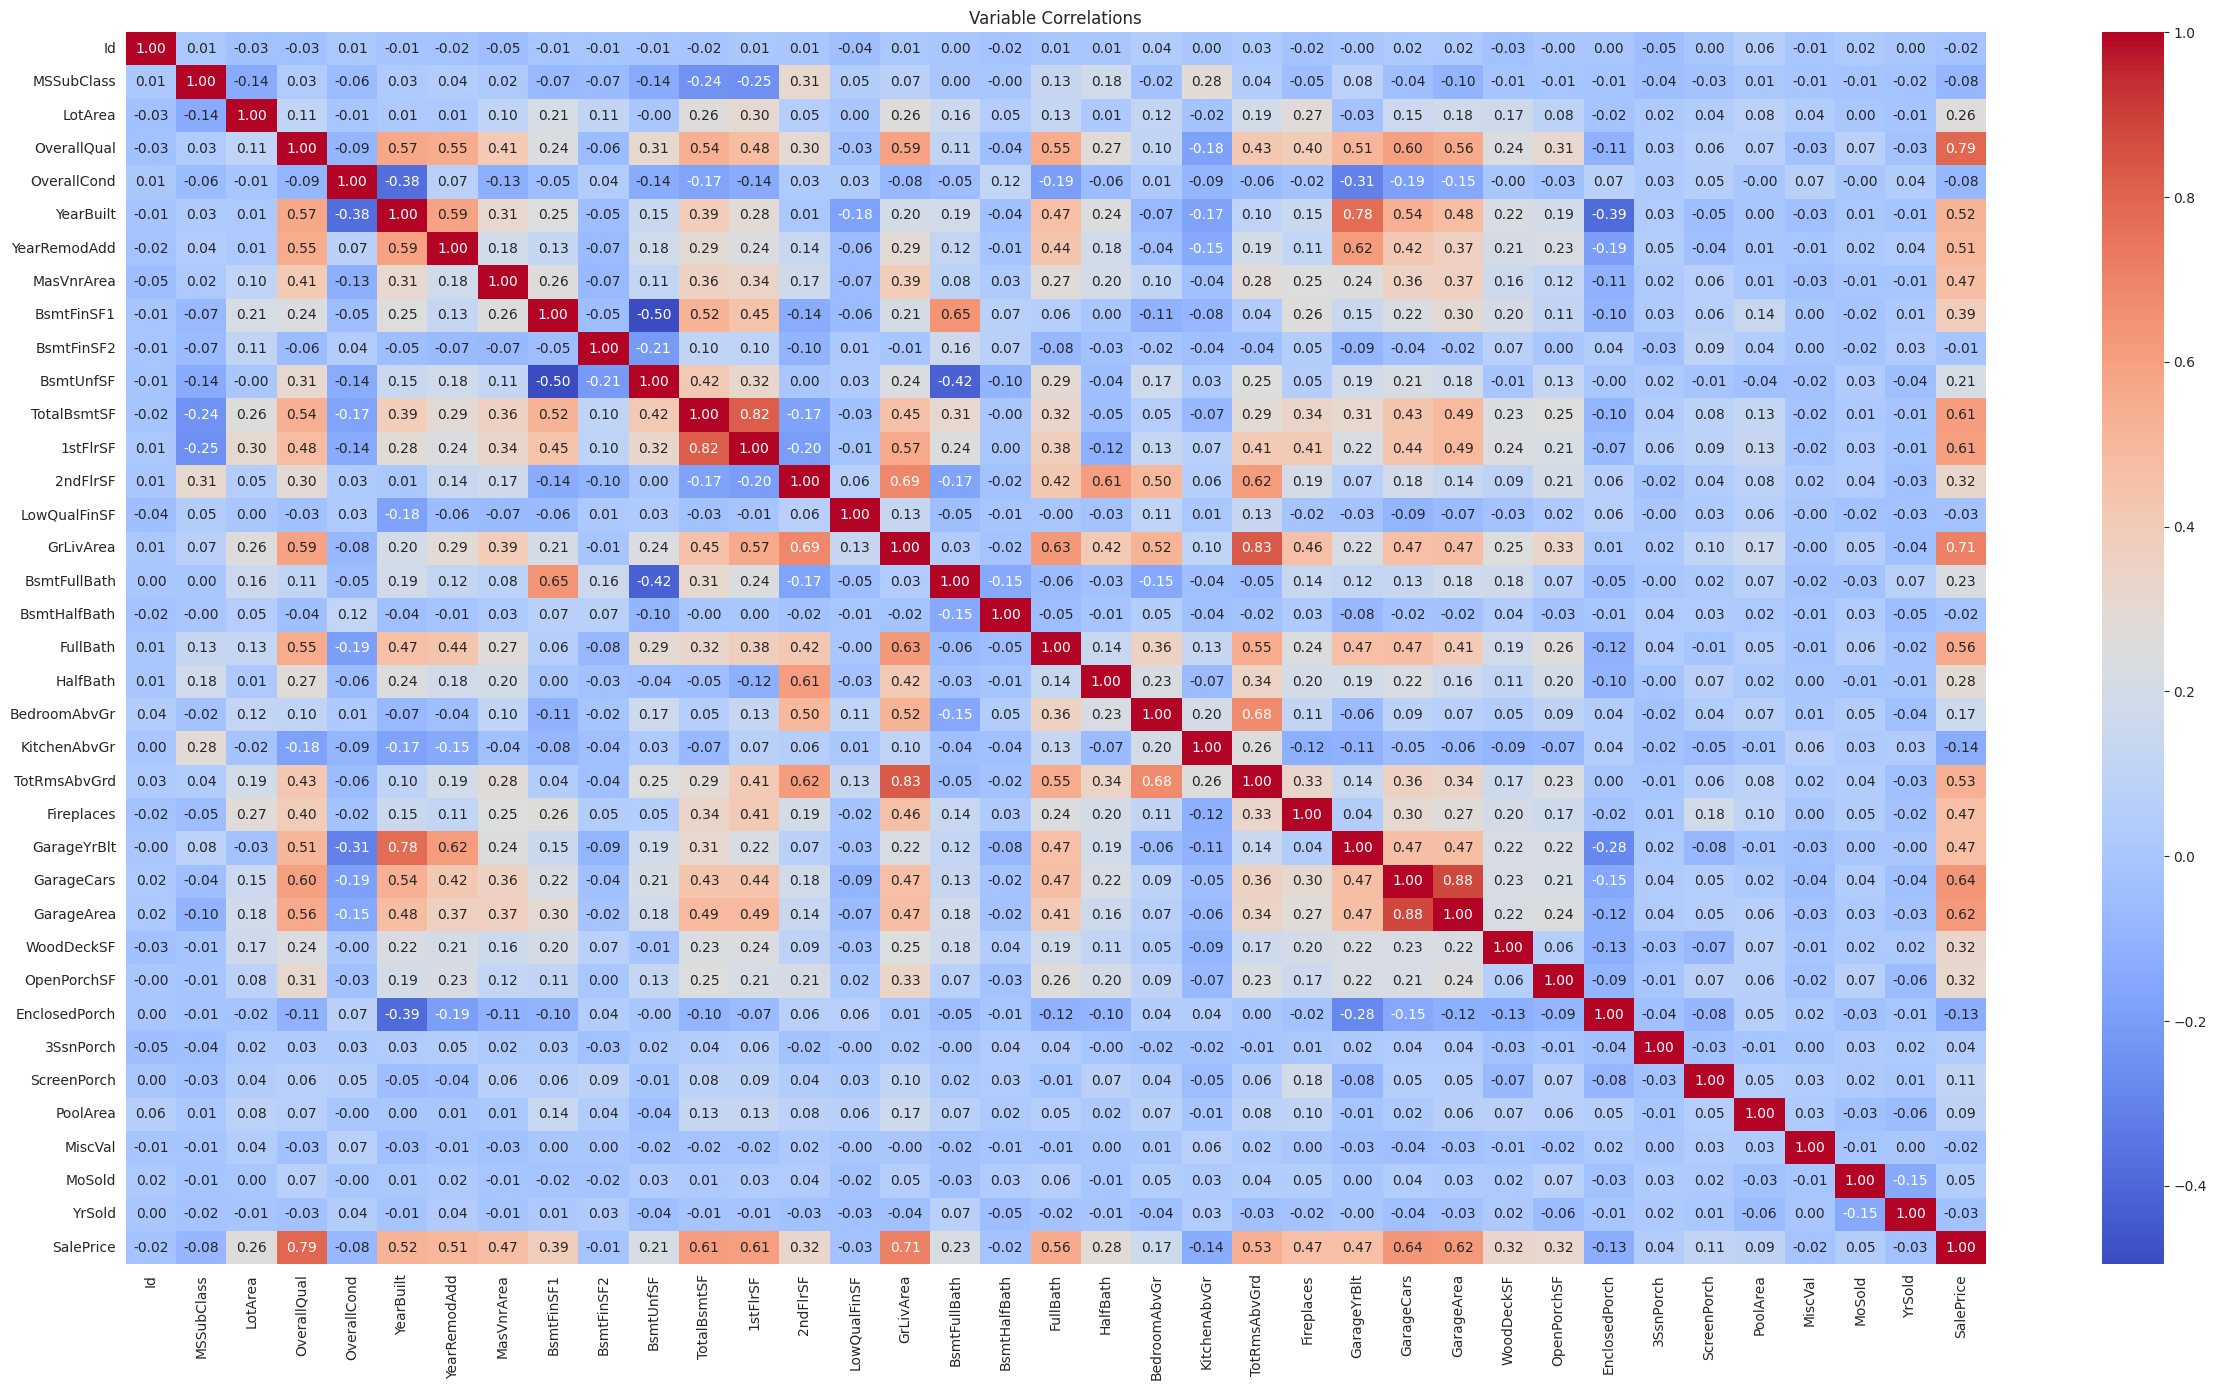

In [89]:
# Before we generate heat map, we should drop all columns contain string
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Create heatmap to show all variable relationship and leave the company
plt.figure(figsize=(30,16))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Variable Correlations")

We will explore and visualize the variable with a high correlation(> 0.7).

1. Columns `SalePrice` and `OverallQual` have a score of 0.79;
2. Columns `GarageYrBlt` and `YearBuilt` have a score of 0.78;
3. Columns `1stFlrSF` and `TotalBsmtSF` have a score of 0.82;
4. Columns `TotRmsAbvGrd` and `GrLivArea` have a score of 0.83;

#### 2.3.3 SalePrice and OverallQual

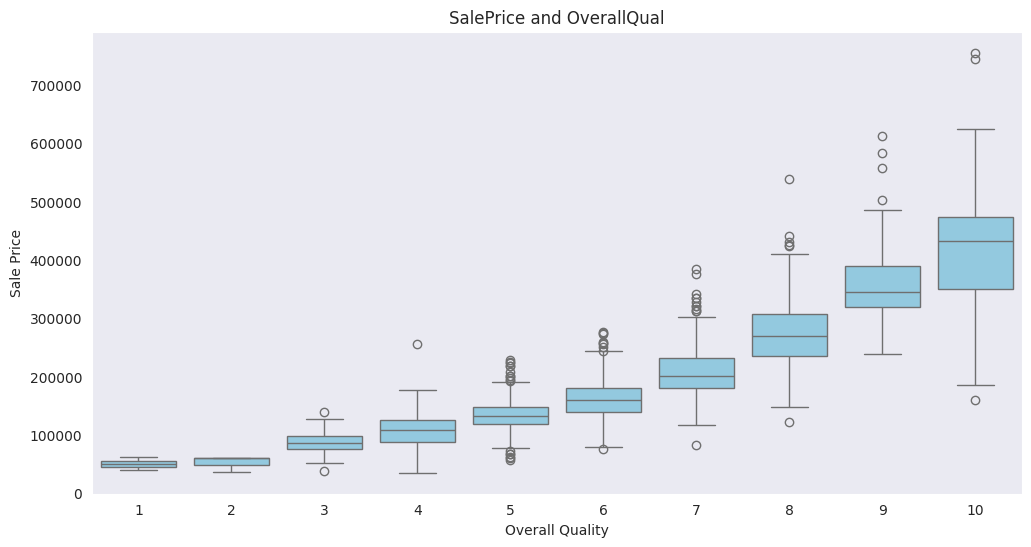

In [90]:
# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="OverallQual", y="SalePrice", data=df, color="skyblue")

plt.title("SalePrice and OverallQual")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()


The trend is evident: as the overall quality improves, the price significantly increases.

#### 2.3.4 GarageYrBlt and YearBuilt

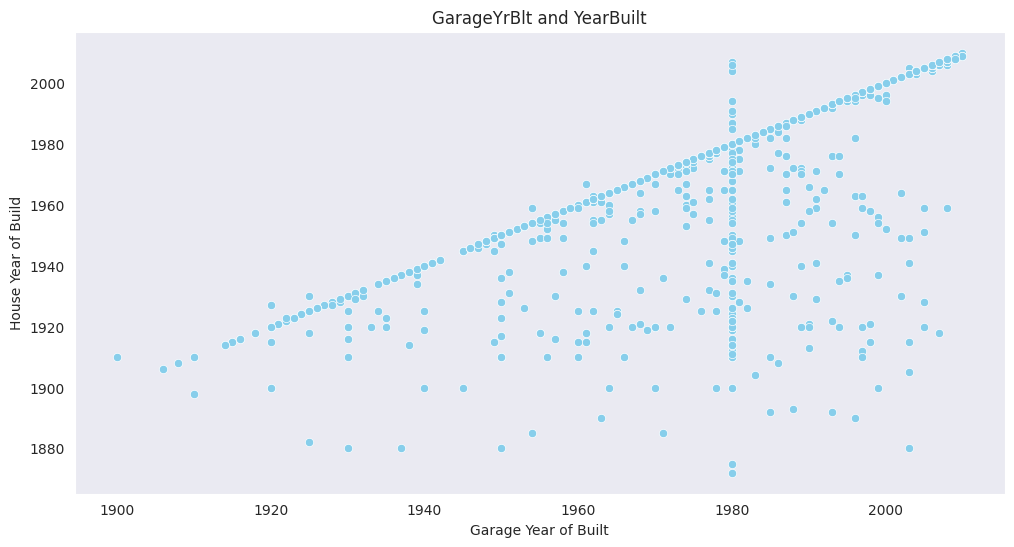

In [91]:
# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x="GarageYrBlt", y="YearBuilt", data=df, color="skyblue")

plt.title("GarageYrBlt and YearBuilt")
plt.xlabel("Garage Year of Built")
plt.ylabel("House Year of Build")
plt.show()


The observed trend is intriguing. Typically, one would expect the year a garage was built to coincide with the construction year of the house. However, an interesting pattern emerges: many houses built in the early 20th century (1900-1960) have garages constructed much later (1960-2000). This suggests that houses built during the earlier period initially lacked garages, which aligns with the historical context that, between 1900 and 1960, owning a car was less common among families, making garages an uncommon feature in homes of that era.

#### 2.3.5 1stFlrSF and TotalBsmtSF

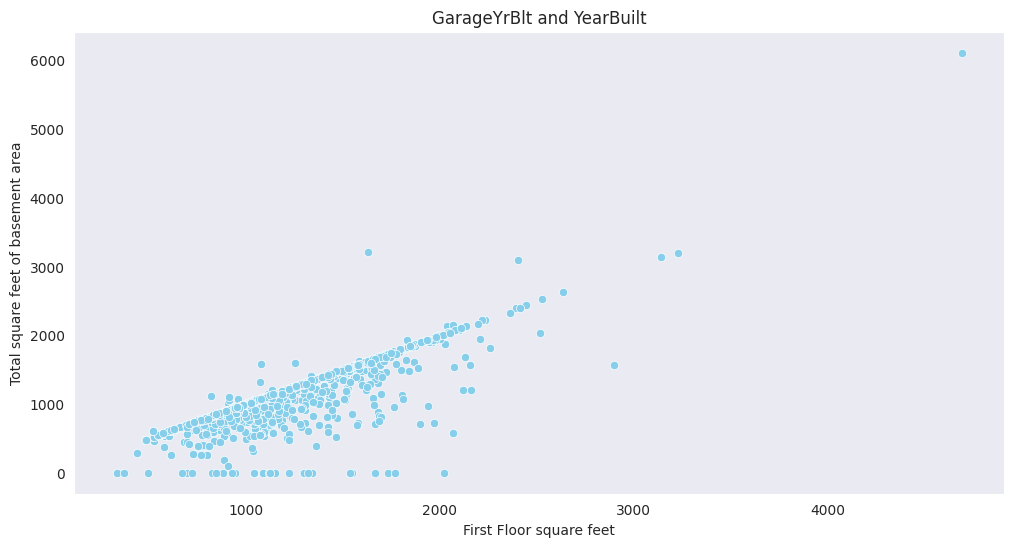

In [92]:
# Create scatter pot
plt.figure(figsize=(12, 6))
sns.scatterplot(x="1stFlrSF", y="TotalBsmtSF", data=df, color="skyblue")

plt.title("GarageYrBlt and YearBuilt")
plt.xlabel("First Floor square feet")
plt.ylabel("Total square feet of basement area")
plt.show()

The graph indicates a modest trend where an increase in the first floor area is associated with an increase in the basement area.

#### 2.3.6 TotRmsAbvGrd and GrLivArea

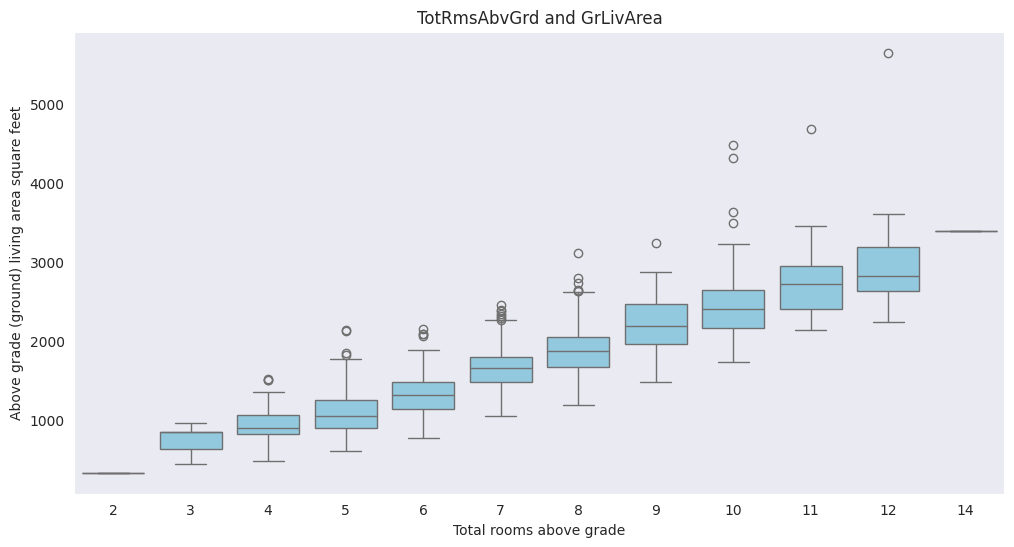

In [93]:
# Create scatter pot
plt.figure(figsize=(12, 6))
sns.boxplot(x="TotRmsAbvGrd", y="GrLivArea", data=df, color="skyblue")

plt.title("TotRmsAbvGrd and GrLivArea")
plt.xlabel("Total rooms above grade")
plt.ylabel("Above grade (ground) living area square feet")
plt.show()

The trend is quite pronounced, reflecting our selection of variables with a high correlation. It's evident that as the total number of rooms above grade increases, the living area above grade also expands.

#### 2.3.6 Best Feature

*Please note that this visualization segment is ideally positioned towards the end of the machine learning modeling process. It's designed to be executed after completing the modeling and identifying the top features influencing the Sale Price. By moving this part earlier, we aim to focus on visualizing how these key features—identified as the most impactful on Sale Price—affect the outcome. This visualization is based on our understanding of the top features, suggesting it should naturally follow the conclusion of the model analysis. However, for the sake of clarity and emphasis on these influential factors, we've chosen to highlight it at this juncture.*

From the GBM model has identified `OverallQual` (Overall Material and Finish Quality) and `GrLivArea` (Above Grade Living Area Square Feet) as the two most significant predictors of the target variable. 

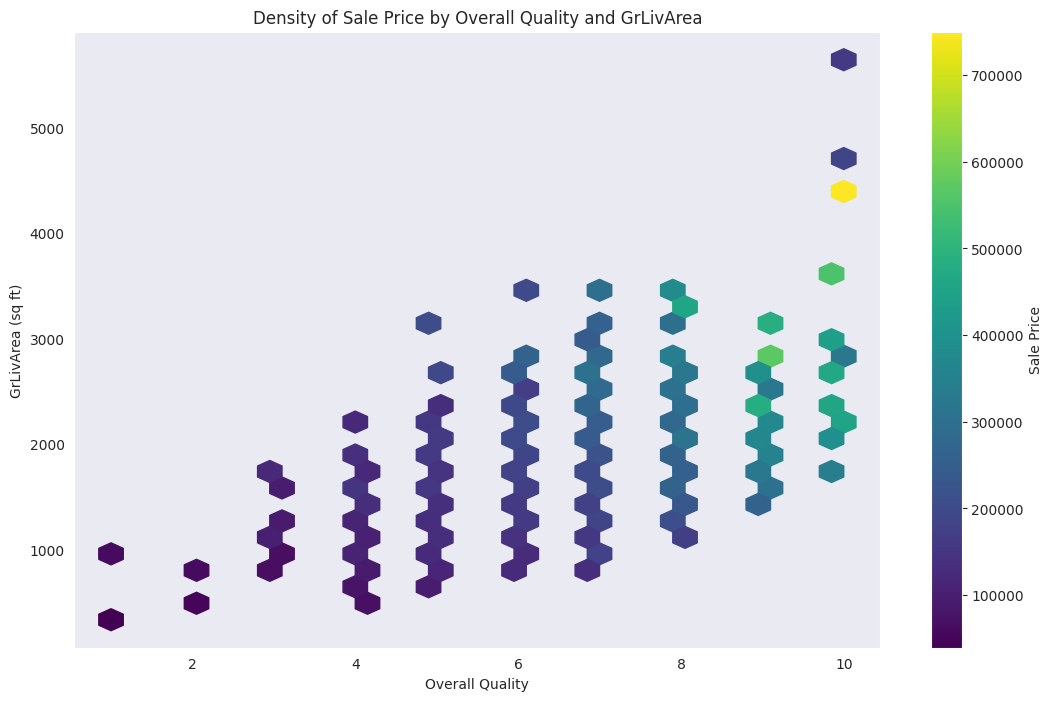

In [94]:
# Hex plot
plt.figure(figsize=(13,8))
plt.hexbin(df["OverallQual"], df["GrLivArea"], C=df["SalePrice"], gridsize=30, cmap="viridis")
plt.colorbar(label="Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("GrLivArea (sq ft)")
plt.title("Density of Sale Price by Overall Quality and GrLivArea")
plt.show()


From the graph, it becomes evident that higher overall quality and larger living areas above ground correlate with increased sale prices.

## **Construct**

### 3.1 Data Processing/Normalization

We will start converting categorical data to numeric data.

<!-- and bring df_train back instead of df. -->

In [95]:
# Convert categorical to numeric
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

# Make sure df and df_test has same number of columns
columns_to_add = set(df.columns) - set(df_test.columns)

for column in columns_to_add:
    df_test[column] = 0
    
# ensure that df_test has the same feature columns in the same order as df, minus the SalePrice column, 
# which is the target variable and hence not present in df_test.
df_test = df_test[df.columns.drop("SalePrice")]

In [96]:
# Set x and y
x = df.drop(columns=["SalePrice", "Id"])  # Id columns not use for modeling
y = df["SalePrice"]

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [97]:
# Normalization
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 3.2 Explore Distinct Model

We will employ seven distinct machine learning models to determine the most effective approach.

#### 3.2.1 Model Initialization and Training

In [98]:
# Initialize the models
models = {
    "gbm": GradientBoostingRegressor(),
    "rf": RandomForestRegressor(),
    "dc": DecisionTreeRegressor(),
    "svm": SVR(),
    "knn": KNeighborsRegressor(),
    "xgb": XGBRegressor(),
    "lgbm": LGBMRegressor()
}

# Loop through the models dictionary
for name, model in models.items():
    model.fit(x_train_scaled, y_train)

# Start Predict
predictions = {}  
for name, model in models.items():
    predictions[f"y_pred_{name}"] = model.predict(x_test_scaled)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3239
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 176
[LightGBM] [Info] Start training from score 182208.341610


#### 3.2.2 Hyperparameter Turning

In [99]:
# Due to time issue, I would't add too many parameter, only 2 paramenter per model

# Create parameter distribution
param_distributions = {
    "gbm": {"n_estimators": randint(100, 500), "max_depth": randint(1, 10)},
    "rf": {"n_estimators": randint(100, 500), "max_depth": randint(1, 10)},
    "dc": {"max_depth": randint(1, 10)},
    "svm": {"C": [0.1, 1, 10], "gamma": [0.001, 0.01, 0.1, 1]},
    "knn": {"n_neighbors": randint(1, 30)},
    "xgb": {"n_estimators": randint(100, 500), "max_depth": randint(1, 10)},
    "lgbm": {"n_estimators": randint(100, 500), "max_depth": randint(1, 10)}
}

best_models = {}

for name, model in models.items():
    searcher = RandomizedSearchCV(model, param_distributions[name], n_iter=10, cv=3, random_state=1)
    searcher.fit(x_train_scaled, y_train)
    best_models[name] = searcher.best_estimator_

best_models

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 158
[LightGBM] [Info] Start training from score 181617.397172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

{'gbm': GradientBoostingRegressor(max_depth=2, n_estimators=171),
 'rf': RandomForestRegressor(max_depth=8, n_estimators=341),
 'dc': DecisionTreeRegressor(max_depth=5),
 'svm': SVR(C=10, gamma=0.01),
 'knn': KNeighborsRegressor(n_neighbors=10),
 'xgb': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=171, n_jobs=None,
              num_parallel_tree=None, random_state=None

We have successfully got the best parameter for each model. Now, we will apply it and run the model again

In [100]:
# Create best_params dictionary
best_params = {
    "gbm": GradientBoostingRegressor(max_depth=2, n_estimators=171),
    "rf": RandomForestRegressor(max_depth=9, n_estimators=355),
    "dc": DecisionTreeRegressor(max_depth=5),
    "svm": SVR(C=10, gamma=0.01),
    "knn": KNeighborsRegressor(n_neighbors=10),
    "xgb": XGBRegressor(max_depth=2, n_estimators=171),  
    "lgbm": LGBMRegressor(max_depth=2, n_estimators=171)
}

trained_models = {}

for name, model in best_params.items():
    model.fit(x_train_scaled, y_train)  
    trained_models[name] = model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3239
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 176
[LightGBM] [Info] Start training from score 182208.341610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

#### 3.2.3 Evaluate Models

We will use following metric to evaluate model: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared.


In [101]:
# MAE
mae_scores = {}

for name, y_pred in predictions.items():
    mae_scores[name] = mean_absolute_error(y_test, y_pred)
    
mae_scores

{'y_pred_gbm': 14376.036886504327,
 'y_pred_rf': 16575.41815068493,
 'y_pred_dc': 23070.45890410959,
 'y_pred_svm': 56595.925191565504,
 'y_pred_knn': 24444.917123287672,
 'y_pred_xgb': 15999.795216181506,
 'y_pred_lgbm': 15383.365240723331}

In [102]:
# MSE
mse_scores = {}

for name, y_pred in predictions.items():
    mse_scores[name] = mean_squared_error(y_test, y_pred)

mse_scores

{'y_pred_gbm': 492325129.246247,
 'y_pred_rf': 721463271.160287,
 'y_pred_dc': 1557327851.9931507,
 'y_pred_svm': 7246160208.020021,
 'y_pred_knn': 1906615323.1790411,
 'y_pred_xgb': 625314265.0561435,
 'y_pred_lgbm': 810837970.2250623}

In [103]:
# RMSE
rmse_scores = {}

for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse_scores[name] = np.sqrt(mse)

rmse_scores

{'y_pred_gbm': 22188.400781630186,
 'y_pred_rf': 26860.068338712153,
 'y_pred_dc': 39462.993449473026,
 'y_pred_svm': 85124.38080843832,
 'y_pred_knn': 43664.80645988301,
 'y_pred_xgb': 25006.284511221245,
 'y_pred_lgbm': 28475.216772222513}

In [104]:
# R Squared
r2_scores = {}

for name, y_pred in predictions.items():
    r2_scores[name] = r2_score(y_test, y_pred)

r2_scores

{'y_pred_gbm': 0.9309690075685743,
 'y_pred_rf': 0.8988405777960865,
 'y_pred_dc': 0.781640463226452,
 'y_pred_svm': -0.01601482589879666,
 'y_pred_knn': 0.7326653869049566,
 'y_pred_xgb': 0.9123220373405666,
 'y_pred_lgbm': 0.8863089725454116}


**Model Performance Overview**

- **Gradient Boosting Machine (GBM)** seems to perform the best across all metrics, indicating it has the best fit among the models tested. It has the lowest MAE, MSE, and RMSE, and the highest R² score.
- **Random Forest (RF)** and **XGBoost (XGB)** also show strong performance, especially in terms of R², indicating they are good at explaining the variance in the dataset.
- **LightGBM (LGBM)** displays competent performance but trails slightly behind GBM and XGB.
- **Decision Tree (DC)** and **K-Nearest Neighbors (KNN)** have higher errors and lower R² scores compared to ensemble methods, which is expected due to the simpler nature of these models.
- **Support Vector Machine (SVM)** performs poorly on this dataset, with significantly higher error metrics and a negative R² score, indicating that the model is worse than a simple mean of the target variable.

**Interpretation**

- **MAE (Mean Absolute Error)**: Lower values are better. GBM's lowest MAE suggests it has the smallest average error per prediction.
- **MSE (Mean Squared Error)** and **RMSE (Root Mean Squared Error)**: Lower values are better. These metrics penalize larger errors more heavily. GBM's performance indicates it is least affected by large individual errors.
- **R² (Coefficient of Determination)**: Values range from -∞ to 1. A value of 1 indicates perfect prediction capability, and values below 0 indicate performance worse than simply predicting the mean of the target variable. GBM, RF, and XGB models show high R² values, indicating strong predictive capability.

### 3.2.4 More Hyperparameter Turning

The GBM model has shown the best, so I will do more parameter turning on it.

In [105]:
# Define the parameter distribution to search
param_dist_gbm = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 10), 
    "min_samples_split": randint(2, 10),  
    "learning_rate": [0.01, 0.05, 0.1, 0.2], 
}

# Initialize the GBM model
gbm_model = GradientBoostingRegressor(random_state=1)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gbm_model, param_distributions=param_dist_gbm, n_iter=100, cv=3, verbose=2, random_state=1, n_jobs=-1, scoring="neg_mean_squared_error")

# Fit the random search to the data
random_search.fit(x_train_scaled, y_train)

# Use the best estimator to make predictions
best_gbm_model = random_search.best_estimator_
y_pred_gbm = best_gbm_model.predict(x_test_scaled)
best_gbm_model

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=233; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=6, n_estimators=172; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=6, n_estimators=172; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=6, n_estimators=172; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=2, n_estimators=229; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=2, n_estimators=229; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=233; total time=   2.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_split=5, n_estimators=233; total time=   2.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_split=2, n_estimators=229; total time=   1.7s


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=6, n_estimators=354; total time=   4.4s
[CV] END learning_rate=0.01, max_depth=8, min_samples_split=6, n_estimators=490; total time=   8.7s
[CV] END learning_rate=0.01, max_depth=8, min_samples_split=6, n_estimators=490; total time=   8.6s
[CV] END learning_rate=0.01, max_depth=8, min_samples_split=6, n_estimators=490; total time=   9.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=6, n_estimators=354; total time=   4.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=6, n_estimators=354; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=6, n_estimators=495; total time=   5.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=6, n_estimators=495; total time=   5.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=6, n_estimators=495; total time=   5.9s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=6, n_estimators=498; total time=   5.8s


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_split=7,
                          n_estimators=359, random_state=1)

In [106]:
best_gbm_model = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=7,
    n_estimators=359,
    random_state=1
)
best_gbm_model.fit(x_train_scaled, y_train)
y_pred_gbm = best_gbm_model.predict(x_test_scaled)

# Get R^2 score
r2 = r2_score(y_test, y_pred_gbm)
r2


0.9351277134318982

We got an R² of 0.935, a little bit higher than before.


#### 3.2.5 Best Feature

       Feature  Importance
0  OverallQual    0.466973
1    GrLivArea    0.161889
2  TotalBsmtSF    0.065289
3   GarageCars    0.051500
4   BsmtFinSF1    0.039607
5      LotArea    0.027110
6     2ndFlrSF    0.020949
7    YearBuilt    0.016940
8  BsmtQual_Ex    0.016200
9     1stFlrSF    0.015097


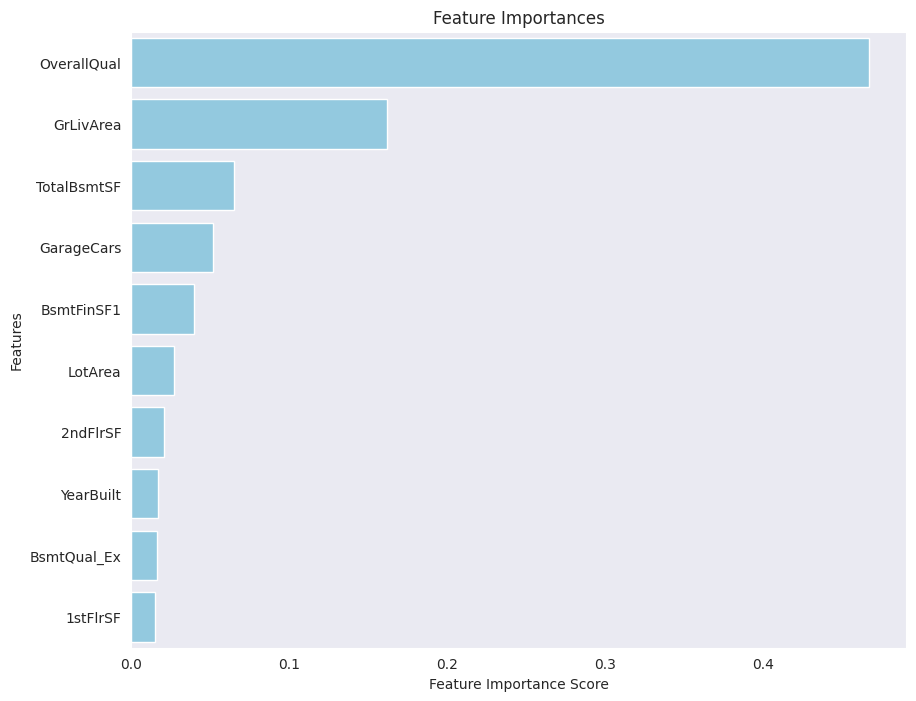

In [107]:
# Get top 10 features
gbm_model = trained_models["gbm"]
feature_importances = gbm_model.feature_importances_

features_df = pd.DataFrame({
    "Feature": x_train.columns, 
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Display the top 15 features
top_10_features = features_df.head(10)
print(top_10_features)

# Display using bar graph
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=top_10_features, color="skyblue")

plt.title("Feature Importances")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")

plt.show()

### 3.3 Make Prediction

Now that the optimal model has been determined, the next step is to apply it to the `df_test` dataset to generate predictions.

In [108]:
# Normalization for df_test and make prediction
test_ids = df_test["Id"].copy()
df_test_scaled = scaler.transform(df_test.drop(columns=["Id"], errors="ignore"))
y_pred_gbm = gbm_model.predict(df_test_scaled)

submissions_df = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": y_pred_gbm
})

submissions_df


,Id,SalePrice
0,1461,120863.060543
1,1462,169045.911947
2,1463,180606.252183
3,1464,178802.474104
4,1465,196697.442681
...,...,...
1454,2915,87332.543535
1455,2916,87907.380998
1456,2917,171934.274730
1457,2918,120658.468031


In [109]:
# Save to CSV for submission
submissions_df.to_csv("submission.csv", index=False)

## **Execute**

### 4.1 Conclusion

In the analysis phase, we discovered that the majority of house sale prices are distributed between approximately $100,000 and $250,000. A heatmap was utilized to discern correlations between variables.

In the construction phase, seven distinct machine learning models were evaluated. Through the process of hyperparameter tuning, the best-performing model was identified.

To evaluate model performance, four metrics were employed: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). To recap, here are the rounded data for all seven models:


| Model | MAE      | MSE            | RMSE     | R²   |
|-------|----------|----------------|----------|------|
| GBM   | 14,313.61 | 499,237,819.99 | 22,343.63 | 0.93 |
| RF    | 16,161.57 | 704,789,628.22 | 26,547.87 | 0.90 |
| DC    | 24,720.72 | 1,681,732,362.96 | 41,008.93 | 0.76 |
| SVM   | 56,595.93 | 7,246,160,208.02 | 85,124.38 | -0.02 |
| KNN   | 24,444.92 | 1,906,615,323.18 | 43,664.81 | 0.73 |
| XGB   | 15,999.80 | 625,314,265.06 | 25,006.28 | 0.91 |
| LGBM  | 15,383.37 | 810,837,970.23 | 28,475.22 | 0.89 |

Upon review, the best model was determined to be the Gradient Boosting Machine (GBM), which outperformed all others across the evaluation metrics.

But there is a interesting thing: the score did't change a lot after hyperparameter tuning, it could show following reason:

If the scores didn't change after hyperparameter tuning, it could suggest a few different possibilities:

-  **Hyperparameter Range**: The ranges for hyperparameters chosen during tuning might not have been wide enough or appropriate to find a better solution than the default settings.

-  **Model Complexity**: The models may already be performing optimally with their default parameters, and the dataset may not benefit from more complex models or the hyperparameters you were tuning.
